In [1]:
import pandas
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
import sklearn.impute 
import sklearn.preprocessing


from sklearn.impute import SimpleImputer
%matplotlib inline

# Import data
- Train data from `./data/salary.train.csv` - - - > data_train
- Test data from `./data/salary.test.csv`   - - - > data_test
- Live data from `./data/high_salary.live.csv` - - - > data_live

In [2]:
data_train = pandas.read_csv('../Data/salary.train.csv').set_index('id')
data_test = pandas.read_csv('../Data/salary.test.csv').set_index('id')
data_live = pandas.read_csv('../Data/high_salary.live.csv').set_index('id')

# Analyze the Data types of each feature

In [3]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [4]:
for feature in data_train:
    print(data_train[feature].value_counts())
    print('---------')

social-security-number
657404344.0    1
438607793.0    1
555786276.0    1
350318677.0    1
356142771.0    1
              ..
793273505.0    1
636152431.0    1
663663491.0    1
564418479.0    1
437358492.0    1
Name: count, Length: 15664, dtype: int64
---------
house-number
4668.0    8
7722.0    7
8866.0    7
7524.0    7
6442.0    7
         ..
7143.0    1
7594.0    1
2059.0    1
8841.0    1
759.0     1
Name: count, Length: 7839, dtype: int64
---------
age-group
2.0    4211
1.0    3916
3.0    3102
0.0    2349
4.0    2091
Name: count, dtype: int64
---------
workclass
private             10555
self-emp-not-inc     1308
local-gov            1112
self-emp-inc          723
state-gov             669
federal-gov           508
without-pay             6
never-worked            2
Name: count, dtype: int64
---------
fnlwgt
125892.0    10
148995.0    10
164190.0     9
193882.0     9
111483.0     9
            ..
118149.0     1
467759.0     1
428584.0     1
295308.0     1
221850.0     1
Name: count,

In [5]:
categorical_features = [
    'age-group', 
    'education', 
    'education-num',
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
    'capitalgain',  
    'capitalloss',  
    'hoursperweek' 
]
for feature in categorical_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

age-group             6 [ 2.  0.  3.  4.  1. nan]
education            17 ['prof-school' 'hs-grad' 'some-college' '1st-4th' 'masters' 'bachelors'
 '11th' 'assoc-acdm' 'assoc-voc' 'doctorate' '7th-8th' '10th' '9th'
 '5th-6th' '12th' nan 'preschool']
education-num        17 [15.  9. 10.  2. 14. 13.  7. 12. 11. 16.  4.  6.  5.  3.  8.  1. nan]
workclass             9 ['self-emp-not-inc' 'private' nan 'self-emp-inc' 'local-gov' 'federal-gov'
 'state-gov' 'never-worked' 'without-pay']
marital-status        8 ['never-married' 'married-civ-spouse' 'separated' 'divorced'
 'married-af-spouse' 'widowed' 'married-spouse-absent' nan]
occupation           15 ['prof-specialty' 'sales' 'exec-managerial' 'craft-repair'
 'machine-op-inspct' nan 'other-service' 'handlers-cleaners'
 'tech-support' 'transport-moving' 'farming-fishing' 'priv-house-serv'
 'adm-clerical' 'protective-serv' 'armed-forces']
relationship          7 ['not-in-family' 'husband' 'other-relative' 'wife' 'own-child' 'unmarried'
 nan]


- define data type

In [6]:
ordinal_features = ['age-group', 'education', 'education-num']
nominal_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
    'capitalgain',  
    'capitalloss',  
    'hoursperweek' 
]
numeric_features = [
    'social-security-number',
    'house-number',
    'fnlwgt'
]

# Missing value

### Handling of missing values for Numerical data

- find the outliers

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -347222698.25, Upper bound: 1451753891.75)
house-number: 0 outliers (Lower bound: -4878.00, Upper bound: 14906.00)
fnlwgt: 480 outliers (Lower bound: -60619.50, Upper bound: 415472.50)


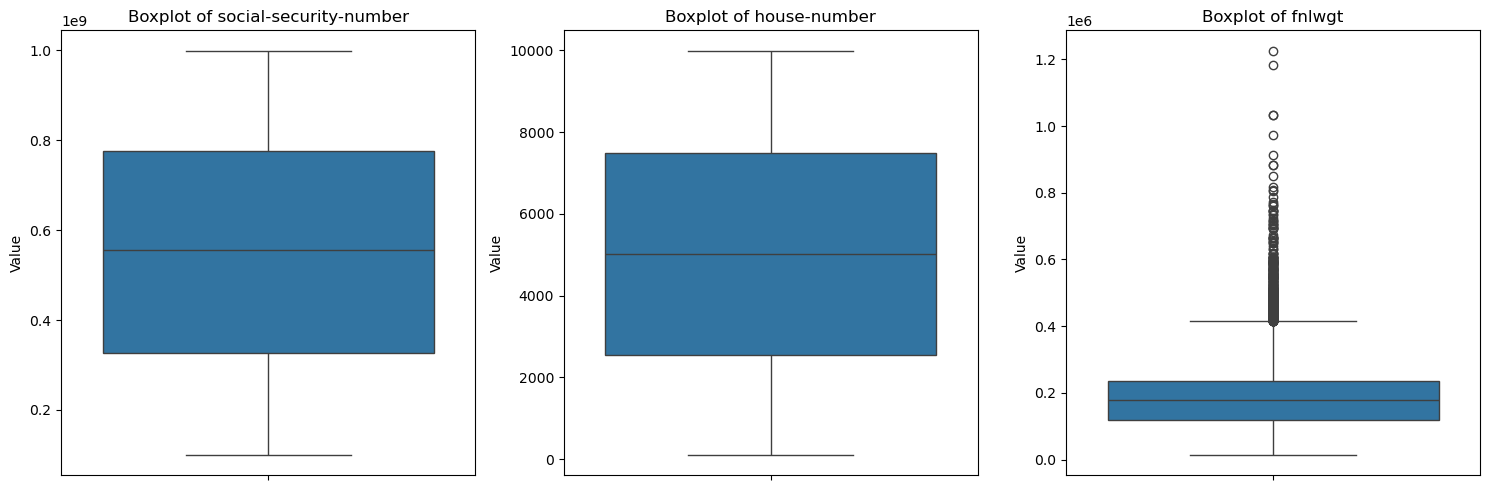

In [7]:
def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_train[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### stratergy
 **Median for**
1. house-number and 
2. Box and fnlwgt 

**Placeholder**
- using ' 0 ' as placeholder
1. social-security-number




In [8]:
ssn_imputer = SimpleImputer(strategy='constant', fill_value=0)
other_imputer = SimpleImputer(strategy='median')


For **Training data** numerical

In [9]:
data_train_numerical_features =data_train[numeric_features]
data_train_numerical_features.isna().sum(axis='index')

social-security-number    11
house-number              18
fnlwgt                    16
dtype: int64

In [10]:
data_train_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_train[['social-security-number']]),
    columns=['social-security-number'],
    index=data_train.index
)
data_train_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_train[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_train.index
)
data_train_numerical_features = pandas.concat([data_train_ssn, data_train_other], axis=1)


After Imputing

In [11]:
data_train_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

For **Testing data** numerical

Before imputing

In [12]:
data_test[numeric_features].isna().sum(axis='index')

social-security-number    3
house-number              9
fnlwgt                    7
dtype: int64

In [13]:
data_test_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_test[['social-security-number']]),
    columns=['social-security-number'],
    index=data_test.index
)
data_test_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_test[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_test.index
)
data_test_numerical_features = pandas.concat([data_test_ssn, data_test_other], axis=1)

After Imputing

In [14]:
data_test_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

For **Live data** numerical

Before Imputing

In [15]:
data_live[numeric_features].isna().sum(axis='index')

social-security-number    2
house-number              9
fnlwgt                    4
dtype: int64

In [16]:
data_live_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_live[['social-security-number']]),
    columns=['social-security-number'],
    index=data_live.index
)
data_live_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_live[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_live.index
)
data_live_numerical_features = pandas.concat([data_live_ssn, data_live_other], axis=1)

After Imputing

In [17]:
data_live_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

### Handling of missing values for Categorical data

In [18]:
ordinal_features = ['age-group', 'education', 'education-num']

In [19]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [20]:
data_train_categorical_features = data_train[categorical_features]
data_test_categorical_features = data_test[categorical_features]
data_live_categorical_features = data_live[categorical_features]

For **Training data** numerical

Before impute

In [21]:
data_train_categorical_features.isna().sum(axis='index')

age-group                6
education               15
education-num           12
workclass              792
marital-status          20
occupation             791
relationship            14
race                    13
sex                     14
native-country-code    301
native-country         302
capitalgain             17
capitalloss             14
hoursperweek            18
dtype: int64

In [22]:
categorical_imputer.fit(data_train_categorical_features)
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_train_categorical_features.index
)

After impute

In [23]:
data_train_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

For **Testing data** numerical

before impute

In [24]:
data_test_categorical_features.isna().sum(axis='index')

age-group                7
education                5
education-num            2
workclass              265
marital-status           3
occupation             263
relationship             7
race                     9
sex                      8
native-country-code     98
native-country          96
capitalgain              6
capitalloss              7
hoursperweek             3
dtype: int64

In [25]:
categorical_imputer.fit(data_test_categorical_features)
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_test_categorical_features.index
)


After impute

In [26]:
data_test_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

For **Live data** numerical

Before impute

In [27]:
data_live_categorical_features.isna().sum(axis='index')

age-group               13
education                7
education-num            8
workclass              345
marital-status           9
occupation             347
relationship            13
race                     7
sex                      7
native-country-code    122
native-country         123
capitalgain              8
capitalloss             10
hoursperweek            13
dtype: int64

In [28]:
categorical_imputer.fit(data_live_categorical_features)
data_live_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_live_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_live_categorical_features.index
)


In [29]:
data_live_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

## Reconstruction of data sets

In [30]:
data_train = (
    data_train_categorical_features
    .join(data_train_numerical_features)
    .join(data_train['label'])
)
data_test = (
    data_test_categorical_features
    .join(data_test_numerical_features)
    .join(data_test['label'])
)
data_live = (
    data_live_categorical_features
    .join(data_live_numerical_features)
)

### Ordinal encoder

In [31]:
for feature in ordinal_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

age-group             5 [2.0 0.0 3.0 4.0 1.0]
education            16 ['prof-school' 'hs-grad' 'some-college' '1st-4th' 'masters' 'bachelors'
 '11th' 'assoc-acdm' 'assoc-voc' 'doctorate' '7th-8th' '10th' '9th'
 '5th-6th' '12th' 'preschool']
education-num        16 [15.0 9.0 10.0 2.0 14.0 13.0 7.0 12.0 11.0 16.0 4.0 6.0 5.0 3.0 8.0 1.0]


In [32]:
ordinal_features = ['age-group', 'education', 'education-num']

In [33]:
ordinal_mapping = [
    [0.0, 1.0, 2.0, 3.0, 4.0],  # age-group
    ['preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'hs-grad', 'some-college', 'assoc-voc', 'assoc-acdm', 'bachelors', 'masters', 'prof-school', 'doctorate'],#education
    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0] # education-num
]

In [34]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder.fit(data_train[ordinal_features])

OrdinalEncoder(categories=[[0.0, 1.0, 2.0, 3.0, 4.0],
                           ['preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'hs-grad', 'some-college',
                            'assoc-voc', 'assoc-acdm', 'bachelors', 'masters',
                            'prof-school', 'doctorate'],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0]])

**Training Data**

In [35]:
data_train_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_train[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_ordinal_features

,age-group,education,education-num
id,,,
2103,2.0,14.0,14.0
14649,0.0,8.0,8.0
7379,2.0,8.0,8.0
24479,2.0,9.0,9.0
19532,3.0,1.0,1.0
...,...,...,...
8695,0.0,9.0,9.0
2192,2.0,9.0,9.0
8250,0.0,8.0,8.0


**Testing Data**

In [36]:
data_test_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_test[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_ordinal_features

,age-group,education,education-num
id,,,
12849,1.0,12.0,12.0
1460,0.0,0.0,0.0
13594,2.0,8.0,8.0
14400,3.0,8.0,8.0
14333,2.0,8.0,8.0
...,...,...,...
981,1.0,11.0,11.0
2952,2.0,11.0,11.0
9470,4.0,15.0,15.0


**Live Data**

In [37]:
data_live_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_live[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_ordinal_features

,age-group,education,education-num
id,,,
6111,0.0,6.0,6.0
11214,1.0,8.0,8.0
5554,4.0,8.0,8.0
25131,2.0,13.0,13.0
14324,3.0,8.0,8.0
...,...,...,...
25998,4.0,12.0,12.0
8375,4.0,8.0,8.0
13888,1.0,6.0,6.0


### Nominal Encoding

In [38]:
nominal_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
    'capitalgain',  
    'capitalloss',  
    'hoursperweek' 
]

In [39]:
for feature in nominal_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

workclass             8 ['self-emp-not-inc' 'private' 'self-emp-inc' 'local-gov' 'federal-gov'
 'state-gov' 'never-worked' 'without-pay']
marital-status        7 ['never-married' 'married-civ-spouse' 'separated' 'divorced'
 'married-af-spouse' 'widowed' 'married-spouse-absent']
occupation           14 ['prof-specialty' 'sales' 'exec-managerial' 'craft-repair'
 'machine-op-inspct' 'other-service' 'handlers-cleaners' 'tech-support'
 'transport-moving' 'farming-fishing' 'priv-house-serv' 'adm-clerical'
 'protective-serv' 'armed-forces']
relationship          6 ['not-in-family' 'husband' 'other-relative' 'wife' 'own-child' 'unmarried']
race                  5 ['white' 'amer-indian-eskimo' 'black' 'asian-pac-islander' 'other']
sex                   2 ['male' 'female']
native-country-code  40 ['USA' 'MEX' 'GBR' 'ITA' 'SLV' 'CAN' 'DUE' 'JAM' 'ECU' 'JPN' 'DOM' 'IRL'
 'PHL' 'CUB' 'VNM' 'GTM' 'TWN' 'HUN' 'FRA' 'UMI' 'HKG' 'KHM' 'IRN' 'CHN'
 'COL' 'PRI' 'YUG' 'POL' 'GRC' 'TTO' 'IND' 'NIC' 'ZAF' '

In [40]:
nominal_categories = [
    ['self-emp-not-inc', 'private', 'self-emp-inc', 'local-gov', 'federal-gov', 'state-gov', 'never-worked', 'without-pay'],  # workclass
    ['never-married', 'married-civ-spouse', 'separated', 'divorced', 'married-af-spouse', 'widowed', 'married-spouse-absent'],  # marital-status
    ['prof-specialty', 'sales', 'exec-managerial', 'craft-repair', 'machine-op-inspct', 'other-service', 'handlers-cleaners', 'tech-support', 'transport-moving', 'farming-fishing', 'priv-house-serv', 'adm-clerical', 'protective-serv', 'armed-forces'],  # occupation
    ['not-in-family', 'husband', 'other-relative', 'wife', 'own-child', 'unmarried'],  # relationship
    ['white', 'amer-indian-eskimo', 'black', 'asian-pac-islander', 'other'],  # race
    ['male', 'female'],  # sex
    ['USA', 'MEX', 'GBR', 'ITA', 'SLV', 'CAN', 'DUE', 'JAM', 'ECU', 'JPN', 'DOM', 'IRL', 'PHL', 'CUB', 'VNM', 'GTM', 'TWN', 'HUN', 'FRA', 'UMI', 'HKG', 'KHM', 'IRN', 'CHN', 'COL', 'PRI', 'YUG', 'POL', 'GRC', 'TTO', 'IND', 'NIC', 'ZAF', 'PRT', 'HND', 'THA', 'HTI', 'LAO', 'PER', 'NLD'],  # native-country-code
    ['united-states', 'mexico', 'england', 'italy', 'el-salvador', 'canada', 'germany', 'jamaica', 'ecuador', 'japan', 'dominican-republic', 'ireland', 'philippines', 'cuba', 'vietnam', 'guatemala', 'taiwan', 'hungary', 'france', 'outlying-us(guam-usvi-etc)', 'hong', 'cambodia', 'iran', 'china', 'columbia', 'puerto-rico', 'yugoslavia', 'poland', 'greece', 'trinadad&tobago', 'india', 'nicaragua', 'south', 'portugal', 'honduras', 'thailand', 'laos', 'peru', 'holand-netherlands', 'haiti', 'scotland'],  # native-country
    [0.0, 4.0, 2.0, 3.0, 1.0],  # capitalgain
    [4.0, 0.0, 3.0, 2.0, 1.0],  # capitalloss
    [2.0, 3.0, 4.0, 0.0, 1.0]  # hoursperweek
]

In [41]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_categories, sparse_output=False, handle_unknown='ignore')
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                           'ecuador', 'japan', 'dominican-republic', 'ireland',
                           'philippines', 'cuba', 'vietnam', 'guatemala',
                           'taiwan', 'hungary', 'france',
                           'outlying-us(guam-usvi-etc)', 'hong', 'cambodia',
                           'iran', 'china', 'columbia', 'puerto-rico',
                           'yugoslavia', 'poland', 'greece', 'trinadad&tobago', ...],
                          [0.0, 4.0, 2.0, 3.0, 1.0], [4.0, 0.0, 3.0, 2.0, 1.0],
                          [2.0, 3.0, 4.0, 0.0, 1.0]],
              handle_unknown='ignore', sparse_output=False)

**Training Data**

In [42]:
data_train_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,capitalloss_4.0,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Testing Data**

In [43]:
data_test_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,capitalloss_4.0,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Live Data**

In [44]:
data_live_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_live[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,capitalloss_4.0,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0
id,,,,,,,,,,,,,,,,,,,,,
6111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Standard scale

In [45]:
numeric_features = [
    'social-security-number',
    'house-number',
    'fnlwgt'
]

In [46]:
std_scaler = sklearn.preprocessing.StandardScaler()
std_scaler.fit(data_train[numeric_features])

StandardScaler()

**Training Data**

In [47]:
df_train_numerical_features = pandas.DataFrame(
    data=std_scaler.transform(data_train[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_train.index
)
df_train_numerical_features

,social-security-number,house-number,fnlwgt
id,,,
2103,-0.436826,-1.291041,1.395572
14649,0.013762,0.304972,-0.873783
7379,-0.776326,-0.256263,-0.592072
24479,-0.753930,-0.571607,-1.349477
19532,-0.639877,-1.588846,2.041308
...,...,...,...
8695,-1.424889,-1.634798,-1.405402
2192,0.939015,-1.428193,-0.821444
8250,0.270820,1.286432,1.210350


**Testing Data**

In [48]:
df_test_numerical_features = pandas.DataFrame(
    data=std_scaler.transform(data_test[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_test.index
)
df_test_numerical_features

,social-security-number,house-number,fnlwgt
id,,,
12849,-0.834899,-0.298707,3.059372
1460,0.694181,0.147475,0.513882
13594,0.981985,0.925137,-0.431537
14400,-1.348050,-0.246793,-0.369835
14333,0.792368,1.182253,-0.509059
...,...,...,...
981,1.445445,0.014533,1.502573
2952,-0.136450,0.365655,-1.293341
9470,-1.363549,-1.342254,-0.618557


**Live Data**

In [49]:
df_live_numerical_features = pandas.DataFrame(
    data=std_scaler.transform(data_live[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_live.index
)
df_live_numerical_features

,social-security-number,house-number,fnlwgt
id,,,
6111,0.051932,1.513732,0.934627
11214,-0.855997,0.503509,-0.211222
5554,-1.268089,-1.695130,-1.551944
25131,-1.316345,-1.043045,-0.341131
14324,1.478140,1.109643,-1.613436
...,...,...,...
25998,-0.848255,0.465625,-0.686208
8375,-0.764094,0.261827,1.041647
13888,0.200565,0.443527,-1.466291


### Label
- All are encoded

In [50]:
data_train[['label']].value_counts()

label
0.0      9102
1.0      6573
Name: count, dtype: int64

In [51]:
data_test[['label']].value_counts()

label
0.0      3033
1.0      2192
Name: count, dtype: int64

## Reconstruction of data sets

In [52]:
data_train = (
    df_train_numerical_features
    .join(data_train_ordinal_features)
    .join(data_train_nominal_features)
    .join(data_train[['label']])
)
data_train

,social-security-number,house-number,fnlwgt,age-group,education,education-num,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0,label
id,,,,,,,,,,,,,,,,,,,,,
2103,-0.436826,-1.291041,1.395572,2.0,14.0,14.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14649,0.013762,0.304972,-0.873783,0.0,8.0,8.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7379,-0.776326,-0.256263,-0.592072,2.0,8.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24479,-0.753930,-0.571607,-1.349477,2.0,9.0,9.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19532,-0.639877,-1.588846,2.041308,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.424889,-1.634798,-1.405402,0.0,9.0,9.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2192,0.939015,-1.428193,-0.821444,2.0,9.0,9.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8250,0.270820,1.286432,1.210350,0.0,8.0,8.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data_test = (
    df_test_numerical_features
    .join(data_test_ordinal_features)
    .join(data_test_nominal_features)
    .join(data_test[['label']])
)
data_test

,social-security-number,house-number,fnlwgt,age-group,education,education-num,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0,label
id,,,,,,,,,,,,,,,,,,,,,
12849,-0.834899,-0.298707,3.059372,1.0,12.0,12.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1460,0.694181,0.147475,0.513882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13594,0.981985,0.925137,-0.431537,2.0,8.0,8.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14400,-1.348050,-0.246793,-0.369835,3.0,8.0,8.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14333,0.792368,1.182253,-0.509059,2.0,8.0,8.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.445445,0.014533,1.502573,1.0,11.0,11.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2952,-0.136450,0.365655,-1.293341,2.0,11.0,11.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9470,-1.363549,-1.342254,-0.618557,4.0,15.0,15.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [54]:
data_live = (
    df_live_numerical_features
    .join(data_live_ordinal_features)
    .join(data_live_nominal_features)
)
data_live

,social-security-number,house-number,fnlwgt,age-group,education,education-num,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,capitalloss_4.0,capitalloss_0.0,capitalloss_3.0,capitalloss_2.0,capitalloss_1.0,hoursperweek_2.0,hoursperweek_3.0,hoursperweek_4.0,hoursperweek_0.0,hoursperweek_1.0
id,,,,,,,,,,,,,,,,,,,,,
6111,0.051932,1.513732,0.934627,0.0,6.0,6.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11214,-0.855997,0.503509,-0.211222,1.0,8.0,8.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,-1.268089,-1.695130,-1.551944,4.0,8.0,8.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25131,-1.316345,-1.043045,-0.341131,2.0,13.0,13.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14324,1.478140,1.109643,-1.613436,3.0,8.0,8.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-0.848255,0.465625,-0.686208,4.0,12.0,12.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8375,-0.764094,0.261827,1.041647,4.0,8.0,8.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13888,0.200565,0.443527,-1.466291,1.0,6.0,6.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Save all files

In [55]:
data_train.to_csv('./data/data_train_processed.csv')
data_test.to_csv('./data/data_test_processed.csv')
data_live.to_csv('./data/data_live_processed.csv')